In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Dataset Columns:**

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality
of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

# **Details about Sleep Disorder Column:**

None: The individual does not exhibit any specific sleep disorder.

Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [87]:
import kagglehub
import zipfile
import os

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

# Tentukan direktori dataset
dataset_dir = path

# Mencari file CSV di dalam semua sub-direktori
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_file_path = os.path.join(root, file)
            print("File CSV ditemukan:", csv_file_path)
            data = pd.read_csv(csv_file_path)
            print(data.head())
            break

File CSV ditemukan: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Bl

In [88]:
#data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [89]:
data['Sleep Disorder'].fillna("No Sleep Disorder", inplace=True)

<ipython-input-89-43f401ff1362>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sleep Disorder'].fillna("No Sleep Disorder", inplace=True)


In [90]:
data[['Sistolic', 'Diastolic']] = data['Blood Pressure'].str.extract(r'(\d+)/(\d+)').astype(int)
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sistolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [91]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [92]:
print(data['Occupation'].unique())
print(data['BMI Category'].unique())
print(data['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['No Sleep Disorder' 'Sleep Apnea' 'Insomnia']


In [93]:
data['Gender'] = data['Gender'].replace({'Female': 1,
                                         'Male': 2}).astype(int)

data['Occupation'] = data['Occupation'].replace({'Software Engineer': 1,
                                                 'Doctor': 2,
                                                 'Sales Representative': 3,
                                                 'Teacher': 4,
                                                 'Nurse': 5,
                                                 'Engineer': 6,
                                                 'Accountant': 7,
                                                 'Scientist': 8,
                                                 'Lawyer': 9,
                                                 'Salesperson': 10,
                                                 'Manager': 11}).astype(int)

data['BMI Category'] = data['BMI Category'].replace({'Normal': 1,
                                                     'Normal Weight': 1,
                                                     'Overweight': 2,
                                                     'Obese': 3}).astype(int)

data['Sleep Disorder'] = data['Sleep Disorder'].replace({'No Sleep Disorder': 0,
                                                         'Sleep Apnea': 1,
                                                         'Insomnia': 2}).astype(int)
data.drop(columns = ['Blood Pressure'], inplace=True)
data.drop(columns = ['Person ID'], inplace=True)

data.dtypes

<ipython-input-93-c6fd8615a0a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female': 1,
<ipython-input-93-c6fd8615a0a1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Occupation'] = data['Occupation'].replace({'Software Engineer': 1,
<ipython-input-93-c6fd8615a0a1>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beh

,0
Gender,int64
Age,int64
Occupation,int64
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,int64
Heart Rate,int64
Daily Steps,int64


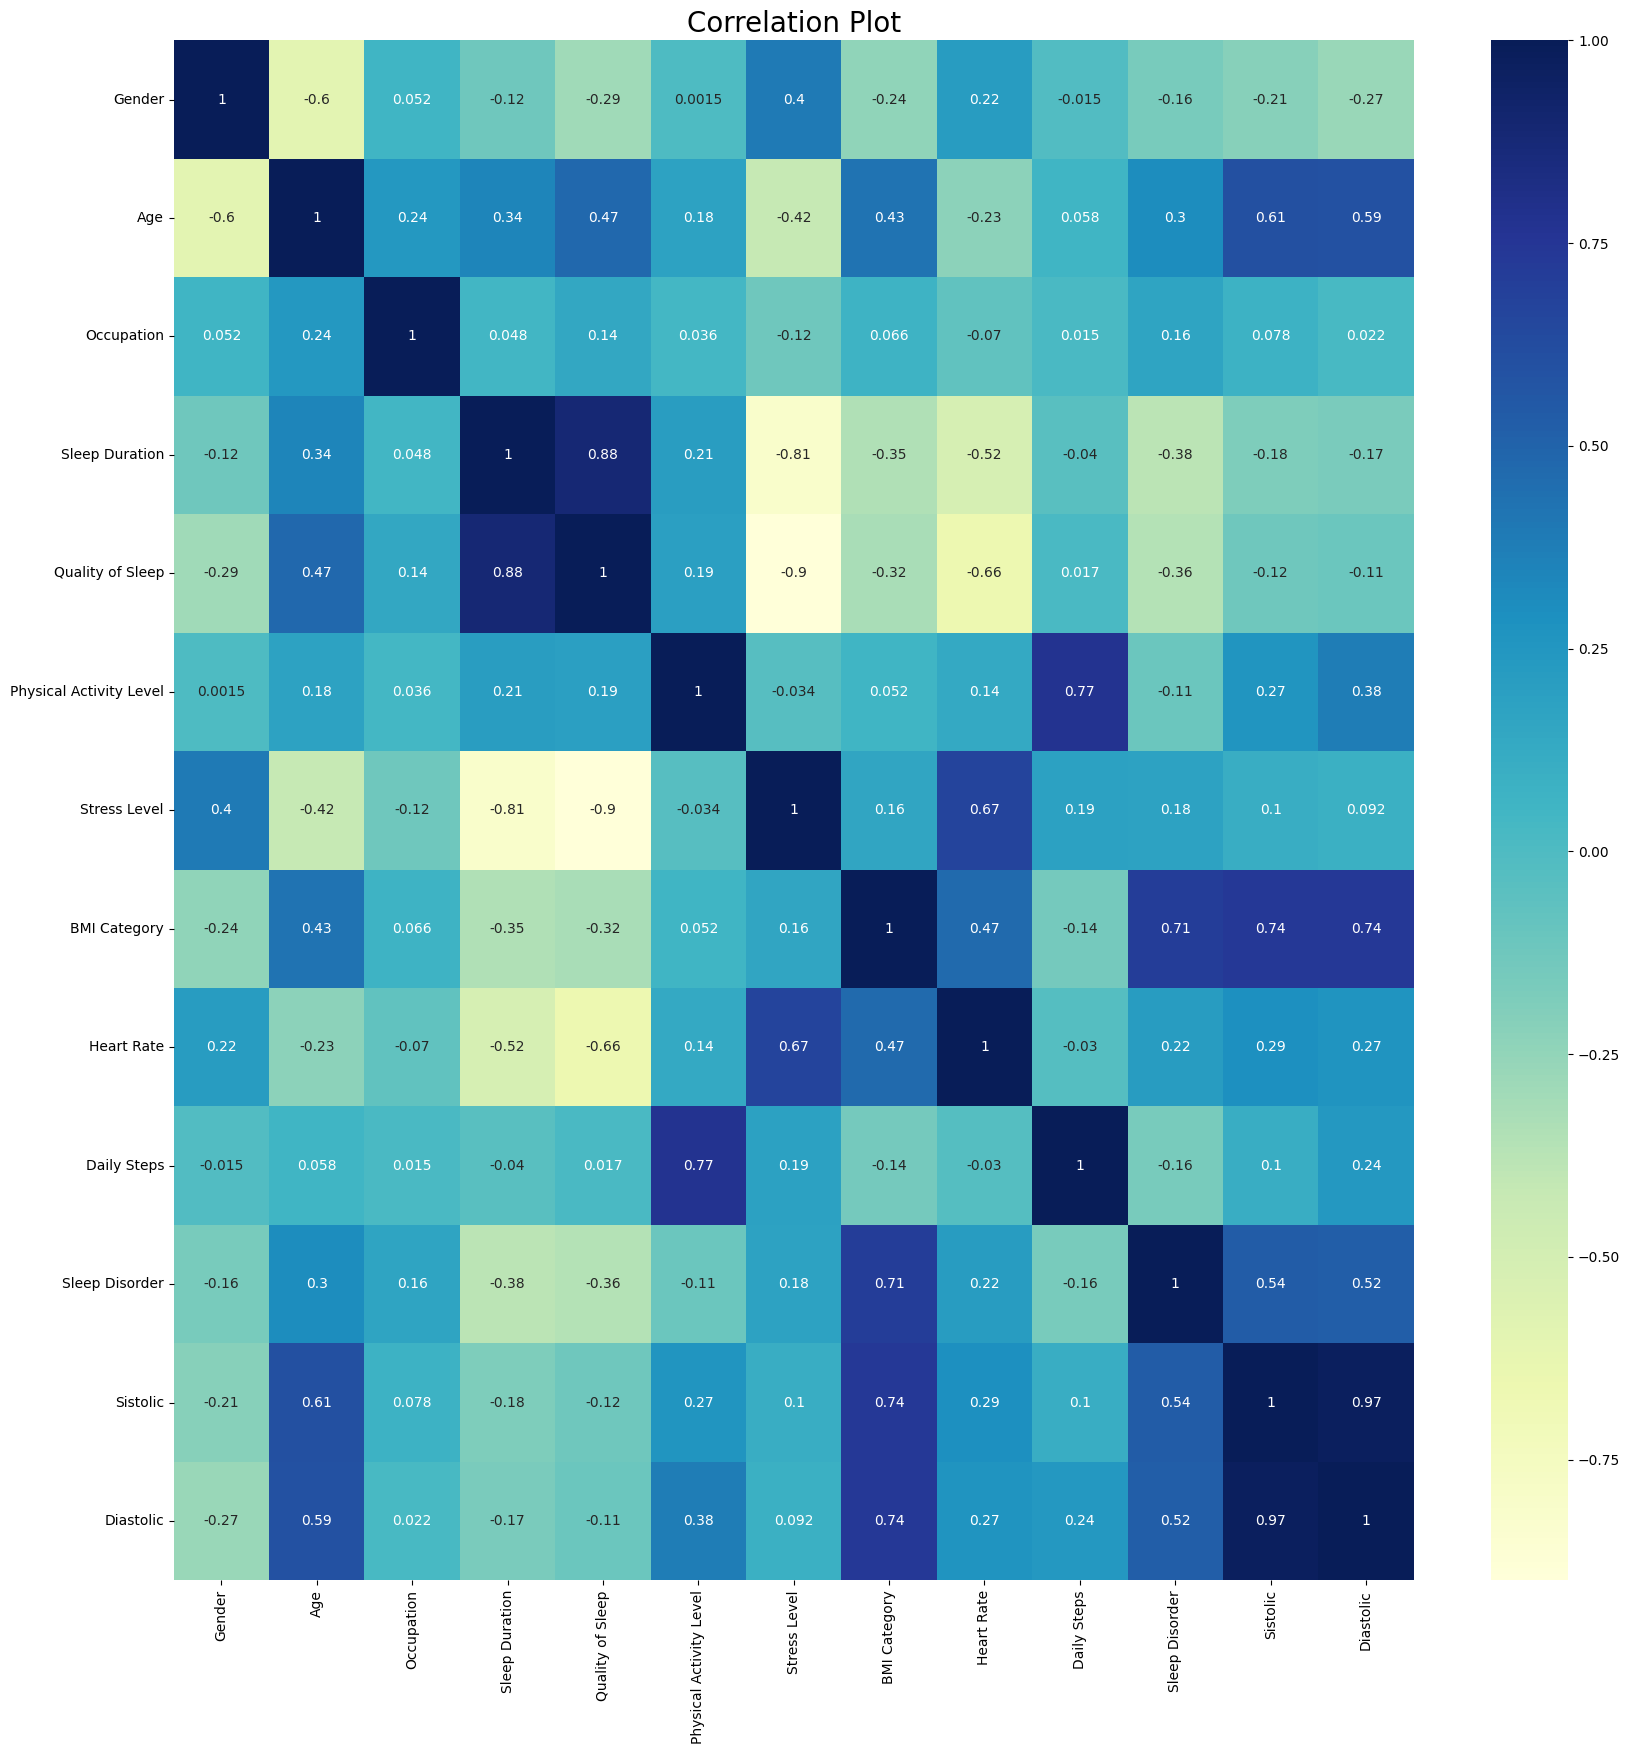

In [94]:
plt.figure(figsize=(20,20))
plt.title("Correlation Plot", size=20)
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

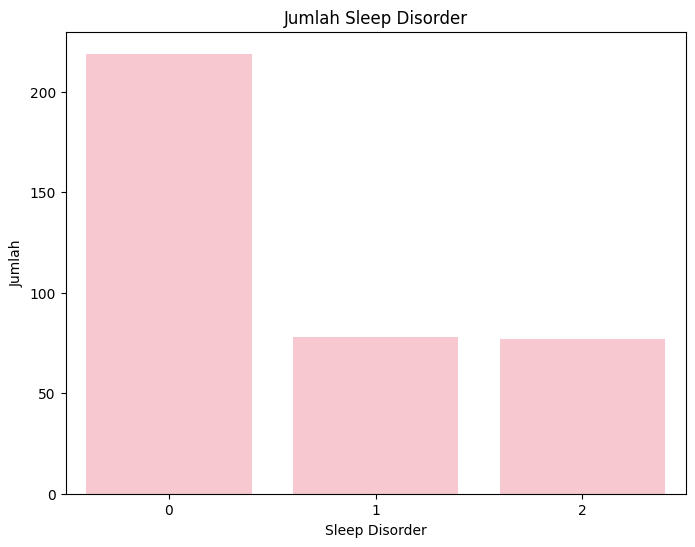

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sleep Disorder', color='pink')

plt.title("Jumlah Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Jumlah")
plt.show()

In [96]:
data['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
0,219
1,78
2,77


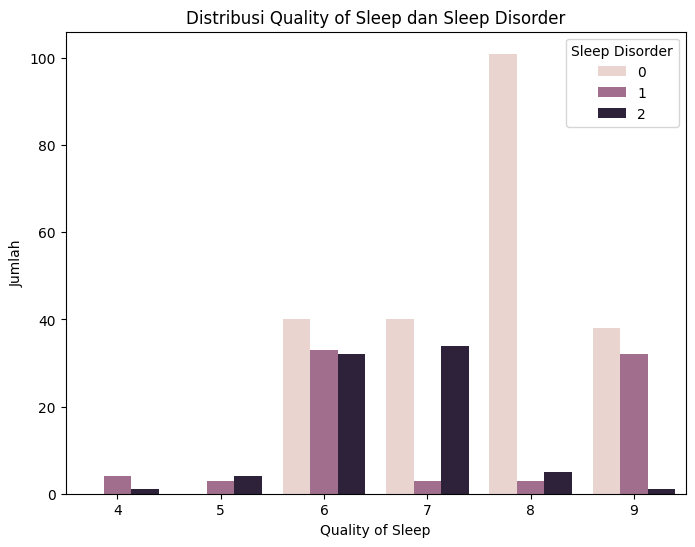

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Quality of Sleep', hue='Sleep Disorder')

plt.title("Distribusi Quality of Sleep dan Sleep Disorder")
plt.xlabel("Quality of Sleep")
plt.ylabel("Jumlah")
plt.show()

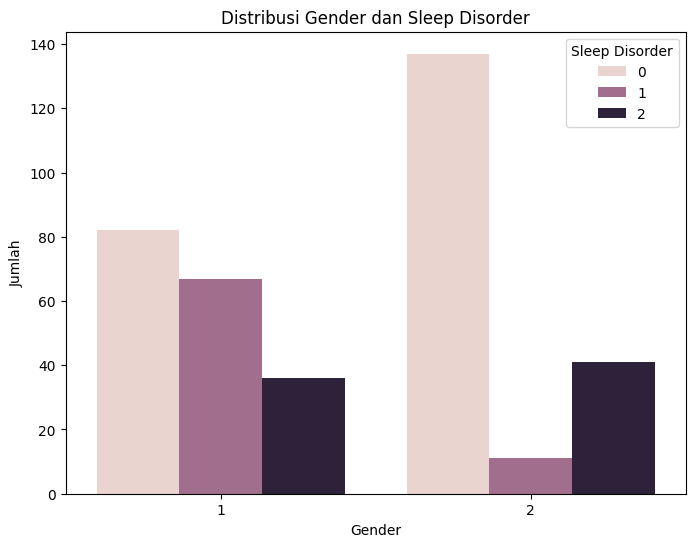

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Sleep Disorder')

plt.title("Distribusi Gender dan Sleep Disorder")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.show()

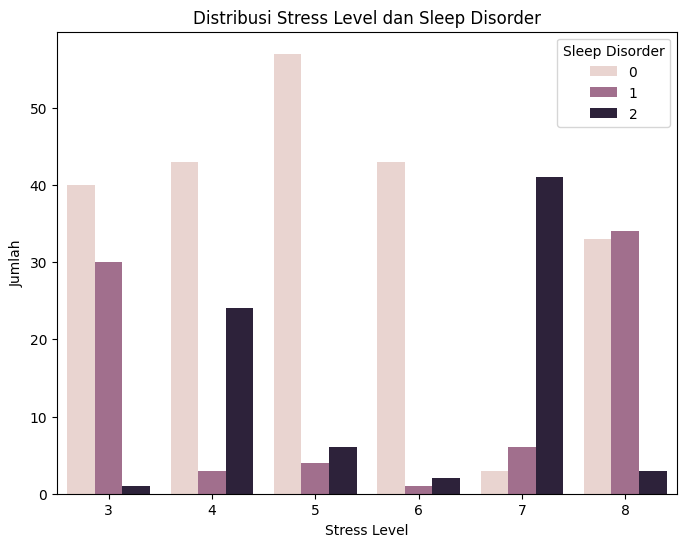

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Stress Level', hue='Sleep Disorder')

plt.title("Distribusi Stress Level dan Sleep Disorder")
plt.xlabel("Stress Level")
plt.ylabel("Jumlah")
plt.show()

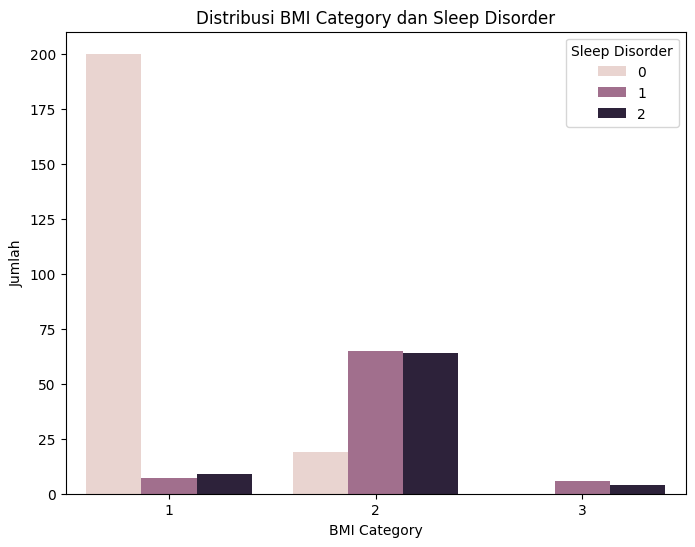

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='BMI Category', hue='Sleep Disorder')

plt.title("Distribusi BMI Category dan Sleep Disorder")
plt.xlabel("BMI Category")
plt.ylabel("Jumlah")
plt.show()

# MACHINE LEARING



In [101]:
no_sleep_disorder = data[data['Sleep Disorder'] == 0]
sleep_apnea = data[data['Sleep Disorder'] == 1]
insomnia = data[data['Sleep Disorder'] == 2]

no_sleep_disorder = no_sleep_disorder.sample(insomnia.shape[0], random_state=1)
sleep_apnea = sleep_apnea.sample(insomnia.shape[0], random_state=1)

data = pd.concat([no_sleep_disorder, sleep_apnea, insomnia], axis=0)
data['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
0,77
1,77
2,77


In [185]:
# Memisahkan fitur (X) dan label (y)
X = data[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sistolic', 'Diastolic']].values
X = X.astype(int)
y = data['Sleep Disorder'].values

In [169]:
len(np.unique(y))

3

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


In [187]:
# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [188]:
print(scaler.mean_)

[1.43478261e+00 4.41594203e+01 5.84057971e+00 6.63043478e+00
 7.10144928e+00 5.94420290e+01 5.63768116e+00 1.65217391e+00
 7.09202899e+01 6.85072464e+03 1.31275362e+02 8.68333333e+01]


In [189]:
print(scaler.var_)

[2.45746692e-01 7.53803823e+01 6.23545474e+00 6.53276623e-01
 1.61289645e+00 4.41724900e+02 3.46292796e+00 2.99306868e-01
 1.93921970e+01 3.12191976e+06 5.89096828e+01 4.04867150e+01]


In [190]:
# build model with tensorflow
from tensorflow.keras import regularizers

# deep neural network
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])


# compile model
optimizer_pick = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)

model.compile(optimizer= optimizer_pick,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [191]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)                    │ (None, 512)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,331 (700.51 KB)

 Trainable params: 179,331 (700.51 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
# set callback for model
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get("accuracy")
        val_acc = logs.get("val_accuracy")

        if train_acc is not None and val_acc is not None:
            if train_acc >= 0.95 and val_acc >= 0.95:
                print(f"\nStopping training at epoch {epoch+1} as criteria met: Train Acc > 90% and Val Acc > 90%")
                self.model.stop_training = True

# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# model fitting
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    callbacks=[MyCallback(), early_stopping] )

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4942 - loss: 7.0965 - val_accuracy: 0.8696 - val_loss: 6.4476
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7853 - loss: 6.3079 - val_accuracy: 0.8913 - val_loss: 5.7566
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8608 - loss: 5.6283 - val_accuracy: 0.8913 - val_loss: 5.1859
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8810 - loss: 5.0537 - val_accuracy: 0.8696 - val_loss: 4.6680
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8674 - loss: 4.5718 - val_accuracy: 0.8696 - val_loss: 4.2159
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8780 - loss: 4.0972 - val_accuracy: 0.8696 - val_loss: 3.8094
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8969 - loss: 3.6872 - val_accuracy: 0.8696 - val_loss: 3.4795
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8808 - loss: 3.3741 - val_accuracy: 0.8913 - val_loss: 3.1899


In [194]:
model.save('./model_sleep/sleep_disorder_model(val_acc93_3).h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

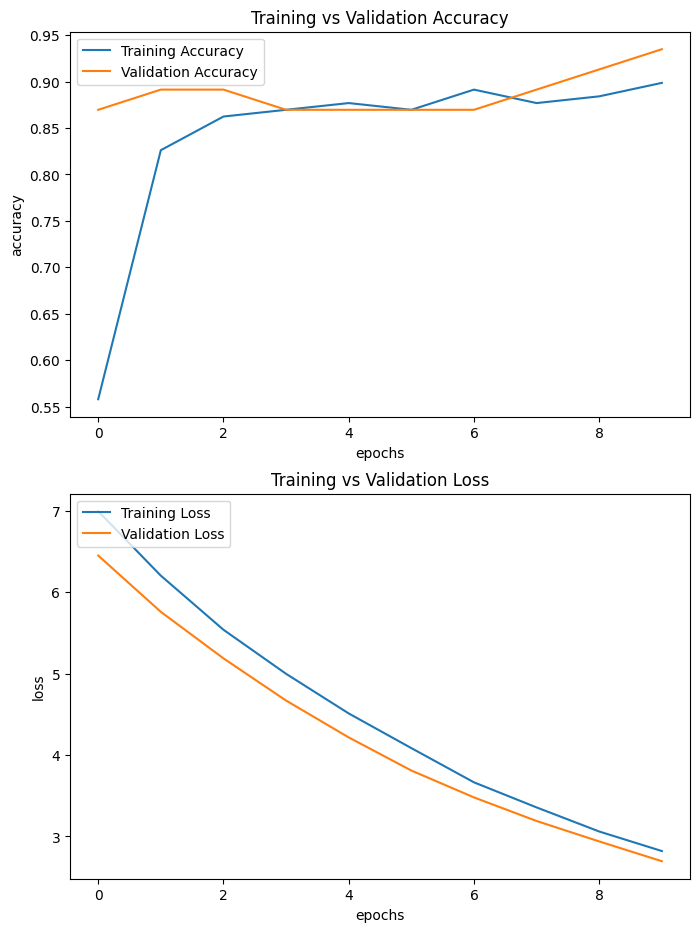

In [193]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')


In [195]:
# Melakukan prediksi
predictions = model.predict(X_test)

# Mengambil kelas dengan probabilitas tertinggi
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)
print(' ')
print(y_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[2 0 0 2 0 2 0 2 1 1 2 0 0 2 2 1 1 0 2 2 1 2 2 0 1 0 1 1 1 1 2 0 2 0 1 1 0
 1 1 1 1 2 1 0 1 0 0]
 
[2 0 0 2 0 2 0 2 2 1 2 0 1 2 2 1 1 0 2 2 1 2 2 2 1 0 1 1 1 1 2 0 1 0 0 1 2
 1 1 1 1 2 1 0 1 1 1]


In [196]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8553 - loss: 2.7192


[2.781325578689575, 0.8297872543334961]

In [ ]:
differences = predicted_classes != y_test  # Boolean array untuk hasil perbandingan
num_differences = np.sum(differences)  # Hitung total perbedaan
percentage_differences = (num_differences / len(y_test)) * 100  # Hitung persentase prediksi yang berbeda

# Menampilkan hasil
print(f"Jumlah prediksi yang berbeda: {num_differences}")
print(f"Persentase prediksi yang berbeda: {percentage_differences:.2f}%")

Jumlah prediksi yang berbeda: 8
Persentase prediksi yang berbeda: 17.02%


In [145]:
occupation_mapping = {'Software Engineer': 1,
                      'Doctor': 2,
                      'Sales Representative': 3,
                      'Teacher': 4,
                      'Nurse': 5,
                      'Engineer': 6,
                      'Accountant': 7,
                      'Scientist': 8,
                      'Lawyer': 9,
                      'Salesperson': 10,
                      'Manager': 11}

gender_mapping = {'Female': 1,
                  'Male': 2}

disorder_mapping = {
    0: "No Sleep Disorder",
    1: "Sleep Apnea",
    2: "Insomnia"}

solution_mapping = {
    0: "Solution for No Sleep Disorder.",
    1: "Solution for Sleep Apnea.",
    2: "Solution for Insomnia."}

def calculate_bmi_category(bmi):
    if bmi <= 24.9:
        return 1
    elif 25 <= bmi <= 29.9:
        return 2
    else:
        return 3

In [ ]:
def predict_with_input(model):

    # user input
    print("Masukkan nilai untuk fitur:")
    gender = str(input("Gender: "))
    gender = gender_mapping.get(gender, -1)
    if gender == -1:
        print("Gender tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    age = int(input("Age: "))
    hours_of_sleep = float(input("Hours of Sleep: "))
    quality_of_sleep = int(input("Quality of Sleep: "))

    occupation = str(input("Occupation: "))
    occupation = occupation_mapping.get(occupation, -1)
    if occupation == -1:
        print("Occupation tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    activity_level = int(input("Activity Level: "))
    stress_level = int(input("Stress Level: "))

    weight = float(input("Weight (kg): "))
    height = float(input("Height (cm): "))
    bmi = weight / ((height / 100) ** 2)
    bmi = calculate_bmi_category(bmi)

    heart_rate = int(input("Heart Rate: "))
    daily_steps = int(input("Daily Steps: "))
    systolic = int(input("Sistolic: "))
    diastolic = int(input("Diastolic: "))

    # fit transform
    input_data = np.array([[gender, age, hours_of_sleep, quality_of_sleep, occupation, activity_level, stress_level,
                            bmi, heart_rate, daily_steps, systolic, diastolic]])
    input_data = scaler.transform(input_data)

    # model predict
    predictions = model.predict(input_data)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)

    # output
    print(f"Hasil Prediksi: Kelas {predicted_class}")

    # nilai sleep disorder
    if predicted_class in disorder_mapping:
        print(f"Prediksi: {disorder_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

    # solution sleep disorder
    if predicted_class in solution_mapping:
        print(f"Solusi Tidur: {solution_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

predict_with_input(model)

Masukkan nilai untuk fitur:
Gender: Female
Age: 30
Hours of Sleep: 9
Quality of Sleep: 9
Occupation: Teacher
Activity Level: 7
Stress Level: 5
Weight (kg): 50
Height (cm): 160
Heart Rate: 99
Daily Steps: 5000
Sistolic: 160
Diastolic: 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Hasil Prediksi: Kelas 0
Prediksi: No Sleep Disorder
Solusi Tidur: Solution for No Sleep Disorder.


In [198]:
from tensorflow.keras.models import load_model

model_load = load_model('./model_sleep/sleep_disorder_model(val_acc93_3).h5')

In [199]:
model_load.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)                    │ (None, 512)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,333 (700.52 KB)

 Trainable params: 179,331 (700.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [200]:
model_load.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8553 - loss: 2.7192 


[2.781325578689575, 0.8297872543334961]

In [ ]:
def predict_with_input(model_load):

    # user input
    print("Masukkan nilai untuk fitur:")
    gender = str(input("Gender: "))
    gender = gender_mapping.get(gender, -1)
    if gender == -1:
        print("Gender tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    age = int(input("Age: "))
    hours_of_sleep = float(input("Hours of Sleep: "))
    quality_of_sleep = int(input("Quality of Sleep: "))

    occupation = str(input("Occupation: "))
    occupation = occupation_mapping.get(occupation, -1)
    if occupation == -1:
        print("Occupation tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    activity_level = int(input("Activity Level: "))
    stress_level = int(input("Stress Level: "))

    weight = float(input("Weight (kg): "))
    height = float(input("Height (cm): "))
    bmi = weight / ((height / 100) ** 2)
    bmi = calculate_bmi_category(bmi)

    heart_rate = int(input("Heart Rate: "))
    daily_steps = int(input("Daily Steps: "))
    systolic = int(input("Sistolic: "))
    diastolic = int(input("Diastolic: "))

    # fit transform
    input_data = np.array([[gender, age, hours_of_sleep, quality_of_sleep, occupation, activity_level, stress_level,
                            bmi, heart_rate, daily_steps, systolic, diastolic]])
    input_data = scaler.transform(input_data)

    # model predict
    predictions = model_load.predict(input_data)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)

    # output
    print(f"Hasil Prediksi: Kelas {predicted_class}")

    # nilai sleep disorder
    if predicted_class in disorder_mapping:
        print(f"Prediksi: {disorder_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

    # solution sleep disorder
    if predicted_class in solution_mapping:
        print(f"Solusi Tidur: {solution_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

predict_with_input(model_load)

Masukkan nilai untuk fitur:
Gender: Female
Age: 30
Hours of Sleep: 9
Quality of Sleep: 9
Occupation: Teacher
Activity Level: 7
Stress Level: 5
Weight (kg): 50
Height (cm): 160
Heart Rate: 99
Daily Steps: 5000
Sistolic: 160
Diastolic: 50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Hasil Prediksi: Kelas 0
Prediksi: No Sleep Disorder
Solusi Tidur: Solution for No Sleep Disorder.


In [201]:
# DEPLOY TO TFLITE

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model_load)
tflite_model = tf_lite_converter.convert()


Saved artifact at '/tmp/tmpvh9d013n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_28')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138524885857760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524886009104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524886023360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524886022304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524884015888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524884020112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524884023984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524884190128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524884021696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138524885394960: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [202]:
tflite_name = 'tf_lite_model_93_3.tflite'

with open(tflite_name, 'wb') as f:
  f.write(tflite_model)